University of Helsinki, Master's Programme in Data Science  
DATA20047 Probabilistic Cognitive Modelling - Spring 2023  
Luigi Acerbi  

# Problem Set 3: Cue combination and learning as inference

- This homework problem set focuses on **Week 5 and 6** of the course.
- This problem set is worth **25 points** in total (out of 100 for the full course).
- Check the submission deadline on Moodle! **Note that the deadline is at noon.**


## Submission instructions

Submission must be perfomed entirely on Moodle (**not** by email).
1. When you have completed the exercises, save the notebook.
2. Report your solutions and answers on Moodle ("*Problem set 3 answer return*").
3. Submit two files on Moodle ("*Problem set 3 notebook return*"): 
  - The notebook as `.ipynb`.
  - The same notebook downloaded as `.pdf` (there are various ways to save the file as PDF, the most general is "File" > "Print Preview" and then print the page to PDF using your browser - remember to enter the Print Preview first).

## IMPORTANT

1. Do not share your code and answers with others. Contrary to the class exercises, which you can do with others, these problems are *not* group work and must be done individually.
2. It is allowed to use snippets of code from the lecture exercises and model solutions.
3. It is your responsibility to ensure that the notebook has fully finished running all the cells, all the plots view properly etc. before submitting it. However, the notebook should be runnable from scratch if needed ("Kernel > Restart & Run All").
4. Submit your work by the deadline.
5. Unless stated otherwise, please report your numerical answers in Moodle with full numerical precision (~14-15 digits), unless the answer is an integer.
6. If you are confused, think there is a mistake or find things too difficult, please ask on Moodle.

## References

- \[**MKG22**\] Ma WJ, Körding K, and Goldreich D. "Bayesian Models of Perception and Action: An Introduction". MIT Press, 2022.
- \[**BVK10**\] Berniker M, Voss M, and Körding K. "Learning Priors for Bayesian Computations in the Nervous System". *PLoS One*, 2010. [Link](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0012686)


#### Acknowledgements

Thanks to Trevor Holland and Wei Ji Ma for sharing the audiovisual experiment data used in Question 3.1.

In [6]:
# set-up -- do not change
import numpy as np
import numpy.random as npr
import scipy as sp
import scipy.stats as sps
import pandas as pd
import matplotlib.pyplot as plt
npr.seed(1)

# Question 3.1 (6 pts)

> In this question, we extend the cue combination observer model seen in class with a prior.

We consider here the standard model of cue combination modeling an audio-visual estimation experiment like the one seen in class and represented in Figure 5.1 of \[**MKG22**\]. All values are measured in degrees of visual angle.

- Differently from the cue combination cases we considered before, here we introduce a Gaussian prior, $p(s) = \mathcal{N}\left(s; \mu_s, \sigma_s^2 \right)$.
- For the rest, we assume the usual setup with two conditionally independent Gaussian measurements, $x_i \sim \mathcal{N}\left(x_i | s_i, \sigma_i^2\right)$ for $i = 1,2$ (with audio = 1 and visual = 2).
- As usual, we also postulate that the observer believes that $s_1 = s_2 = s$, so that their posterior is:
$$
p(s|x_1, x_2) \propto p(s) p(x_1|s) p(x_2|s).
$$
- We ignore motor noise (i.e, $r = \hat{s}$, or equivalently $\sigma_\text{motor} = 0$ deg). In other words, the estimate distribution is equivalent to the response distribution $p(\hat{s}|s_1, s_2) = p(r|s_1, s_2)$. *Note*: This is not relevant for part a, but only for part b of this exercise.

Throughout the exercise, we assume the following model parameters:
$$
\mu_s = 1 \text{ deg}, \; \sigma_s = 2 \text{ deg}, \quad \sigma_1 = 2 \text{ deg}, \; \sigma_2 = 3 \text{ deg}.
$$

- a) Compute the observer's posterior distribution $p(s|x_1,x_2)$ for $x_1 = 3, x_2 = -1$ deg. Report the posterior mean $\mu_\text{post}$ and standard deviation $\sigma_\text{post}$ in Moodle.
- b) Compute the observer's estimate distribution $p(\hat{s}|s_1, s_2)$ for $s_1 = 6, s_2 = 0$ deg, assuming they use the posterior mean estimate $\hat{s}_\text{PM} = \mu_\text{post}$ calculated above. Report the estimate distribution mean $\mu_\text{est}$ and standard deviation $\sigma_\text{est}$ in Moodle.

*Hints*: 
- Be careful that in this case (non-flat prior), the variance of the estimate distribution $\sigma_\text{est}^2$ is *not* equal to the posterior variance $\sigma_\text{post}^2$.
- For this exercise, it might be convenient to use the precision representation from the book, using $J = \frac{1}{\sigma^2}$.
- You are asked to get to the results analytically, thus report your solutions up to numerical precision. For exercise (b), simulation results within $\pm 0.01$ from the correct solution will be accepted, but will only give half points.

In [181]:
# a)

# Define the parameters
mu_s = 1
sigma_s = 2
sigma_1 = 2
sigma_2 = 3

# Define data
x1 = 3
x2 = -1

# Define J

j1 = 1/(sigma_1 ** 2)
j2 = 1/(sigma_2 ** 2)

mu_post = (x1 * j1 + x2 * j2)/(j1 + j2)
sigma_post = np.sqrt(1/(j1 + j2))
mu_post = ((mu_post * sigma_s ** 2) + (mu_s * sigma_post ** 2))/(sigma_s ** 2 + sigma_post ** 2)
sigma_post = np.sqrt((sigma_s ** 2 * sigma_post ** 2)/(sigma_s ** 2 + sigma_post ** 2))
# Define s grid
lb = mu_s - 5 * sigma_s
ub = mu_s + 5 * sigma_s
Ns = 2**10+1
s_col = np.linspace(lb, ub, Ns).reshape((Ns,1))
ds = s_col.flatten()[1] - s_col.flatten()[0]

# Define likelihood

prior = sps.norm(mu_s, sigma_s).pdf(s_col)
likelihood_x1 = sps.norm(s_col, sigma_1).pdf(x1)
likelihood_x2 = sps.norm(s_col, sigma_2).pdf(x2)


protoposterior = prior * likelihood_x1 * likelihood_x2
posterior = protoposterior / sp.integrate.romb(protoposterior, dx=ds, axis=0)

posterior_mean = sp.integrate.romb(s_col * posterior, dx=ds, axis=0)
posterior_var = np.sqrt(sp.integrate.romb((s_col**2) * posterior, dx=ds, axis=0) - posterior_mean ** 2)

print(mu_post, sigma_post)
print(posterior_mean, posterior_var)

1.4545454545454544 1.2792042981336627
[1.45454545] [1.2792043]


In [191]:
s1 = 6
s2 = 0

# Define grid

mean_est = (mu_s + sigma_s**2 *(j1*s1 + j2*s2))/(1+sigma_s**2*(j1+j2))


sig_est = np.sqrt((sigma_s**4 * j1 ** 2 * sigma_1 ** 2 + sigma_s**4 * j2 ** 2 * sigma_2 ** 2)/((1+sigma_s**2*(j1+j2))**2))
print(mean_est,sig_est)

2.8636363636363633 0.9833321660356333


# Question 3.2 (6 pts)

> In this problem, we can now use our knowledge to fit data from a real audio-visual cue combination experiment!

The data have been preprocessed for the purpose of this exercise. We use here the `simplecue` model, defined below:

- We assume an observer with a flat prior $p(s) = 1$ (i.e., "no prior").
- The measurement noise for the auditory stimulus is $p(x_1|s_1) = \mathcal{N}(x_1|s_1, \sigma_{1}^2)$, as usual. 
- In this experiment, there are *two* possible levels for the visual noise, *low* noise (`0`) and *high* noise (`1`). Experimentally, the visual stimulus is made "noisier" in a trial by blurring and/or reducing the contrast the stimulus. So, the measurement noise for the visual stimulus depends on the visual noise level in the trial, such that
  $$\mathcal{N}(x_2|s_2, \sigma_{2,\text{low}}^2) \text{ if noise level is 0,} \qquad \text{and} \qquad
  \mathcal{N}(x_2|s_2, \sigma_{2,\text{high}}^2) \text{ if noise level is 1}.
  $$
- We assume that the observer is aware of the noise level in each trial.
- As usual in simple cue combination, the observer believes that $s_1 = s_2 = s$.
- The observer reports the posterior mean estimate $\hat{s}_\text{PM}$. We assume zero motor noise ($r = \hat{s}$ and $\sigma_\text{motor} = 0$).
- The model parameters are thus $\theta = \left(\sigma_1, \sigma_{2,\text{low}}, \sigma_{2,\text{high}} \right)$.

We analyze a dataset of audiovisual estimation data from a single subject.
The dataset consists of a table with four columns, where each row represents a trial of the experiment. The four columns are:
- The location of the auditory stimulus `s1` (in deg).
- The location of the visual stimulus `s2` (in deg).
- The noise level of the visual stimulus `noise_level`, here `0` (low noise) or `1` (high noise). 
- The observer's response `r` (in deg).

---------------------------------

- a) As a sanity check, compute the log-likelihood of the full dataset for model parameters $\theta_0 = (\sigma_1 = 4, \sigma_{2,\text{low}} = 6, \sigma_{2,\text{high}} = 8)$ and report the result in Moodle.
- b) Fit the model above to the data using maximum-likelihood esimation (MLE). Report in Moodle the log-likelihood at the MLE solution.

*Hint*:
- In part (a), you should find that $-2050 < \log \mathcal{L}(\theta_0) < -2000$.

In [ ]:
# Load data of audiovisual cue combination experiment from .csv file
df = pd.read_csv('https://www2.helsinki.fi/sites/default/files/atoms/files/avcue_data_0.csv')
df = df.to_numpy()
s1 = df[:,0]
s2 = df[:,1]
noise_level = df[:,2].astype(int)
r = df[:,3]

In [ ]:
sigma1 = 4
sigma2low = 6
sigma2high = 8

def gaussian_likelihood(sigma1, sigma2, s1,s2):
    w1 = (sigma2 ** 2)/(sigma1 ** 2 + sigma2 ** 2)
    w2 = 1 - w1
    mu_rept = w1 * s1 + w2 * s2
    var_rept = (w1**2) * (sigma1 **2) + (w2**2) * (sigma2 **2)
    return mu_rept, np.sqrt(var_rept)

def log_like_low(r, s1, s2):
    mu_low,sigma_low  = gaussian_likelihood(sigma1,sigma2low,s1,s2)
    loglike = sps.norm(mu_low,sigma_low).logpdf(r)
    return np.sum(loglike)
def log_like_high(r, s1, s2):
    mu_high,sigma_high  = gaussian_likelihood(sigma1,sigma2high,s1,s2)
    loglike = sps.norm(mu_high,sigma_high).logpdf(r)
    return np.sum(loglike)

log_like_low(r[noise_level == 0], s1[noise_level == 0], s2[noise_level == 0]) + log_like_high(r[noise_level == 1], s1[noise_level == 1], s2[noise_level == 1])

-2034.6551809030655

In [ ]:
def idealgaussianobserver_loglike(theta,r_vec,s1_vec,s2_vec, noise_level):
    sigma1 = theta[0]
    sigma2_low = theta[1]
    sigma2_high = theta[2]
    s1_low = s1_vec[noise_level == 0]
    s2_low = s2_vec[noise_level == 0]
    r_low = r_vec[noise_level == 0]
    s1_high = s1_vec[noise_level == 1]
    s2_high = s2_vec[noise_level == 1]
    r_high = r_vec[noise_level == 1]
    mu_low,sigma_low = gaussian_likelihood(sigma1, sigma2_low, s1_low, s2_low)
    mu_hi,sigma_hi = gaussian_likelihood(sigma1, sigma2_high, s1_high, s2_high)
    loglike_low = np.sum(sps.norm(mu_low,sigma_low).logpdf(r_low))
    loglike_hi = np.sum(sps.norm(mu_hi,sigma_hi).logpdf(r_high))
    loglike = loglike_low + loglike_hi
    return loglike

In [ ]:
def loss_fn(theta):
    return -idealgaussianobserver_loglike(theta, r,s1,s2,noise_level)

In [ ]:
from scipy.optimize import minimize
minimize(loss_fn, np.array([1, 1, 1]), method="BFGS")

      fun: 1604.1495487403804
 hess_inv: array([[ 2.55264059e-01,  3.83205878e-03, -1.54517877e-02],
       [ 3.83205878e-03,  4.97529815e-02, -8.77087964e-06],
       [-1.54517877e-02, -8.77087964e-06,  1.19130888e-01]])
      jac: array([0., 0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 304
      nit: 51
     njev: 76
   status: 0
  success: True
        x: array([ 9.23117397,  4.63302096, -6.78172808])

# Question 3.3 (6 pts)

> In this question, we consider learning the probability of a binary event through noisy measurements. A similar task is used in behavioral tasks with humans and animals to explore the nature of decision making (see notes).

We consider here the following decision-making task:

- In each trial of the task, the observer needs to press an arrow key depending on whether they are shown a left-tilted or a right-tilted grating on a screen.
- In each trial $i$, the grating orientation $s_i$ is either -1 (left) or 1 (right), with $p(s_i = 1) = \pi_\text{R}$ and $p(s_i = -1) = 1 - \pi_\text{R}$, where $\pi_\text{R} \in (0, 1)$ is the probability of the grating being right-tilted.
- The observer only sees a noisy measurement of orientation $x_i$, with $p(x_i|s_i) = \mathcal{N}\left(x_i|s_i,\sigma^2\right)$. In this exercise, we assume $\sigma = 1$.
- Assume the observer starts with a flat prior over $\pi_\text{R}$, that is $p(\pi_\text{R}) = 1$ for $\pi_\text{R} \in (0, 1)$.

Compute numerically the posterior $p(\pi_\text{R}|\textbf{x}_\text{obs})$ that the Bayesian observer would have after having observed the full sequence of noisy measurements $\textbf{x}_\text{obs} = \left(x_1, \ldots, x_T\right)$ provided below (assuming no feedback is given to the subject). Report in Moodle the mean and standard deviation of the posterior over $\pi_\text{R}$ at the end of the last trial $T$.


*Hint*: Given the posterior $ p(\pi_\text{R}| x_1,\ldots, x_{t-1})$ at the end of the previous trial $t-1$ (where $t = 0$ is the prior), you can compute the posterior at trial $t$ as
$$
p(\pi_\text{R} | x_1, \ldots, x_t) \propto p(\pi_\text{R}| x_1,\ldots, x_{t-1}) \left[ p(x_{t}| s_t = 1) p(s_{t} = 1|\pi_\text{R}) + p(x_{t}| s_t = -1) p(s_{t} = -1|\pi_\text{R})\right],
$$
where all the terms are defined above.

*Notes*: 
- A similar task is being used with mice by the [International Brain Laboratory](https://www.internationalbrainlab.com/#home) to explore the nature of decision making (see [this paper](https://elifesciences.org/articles/63711)). The experiments show that, after training, mice adapt their responses according to changes of $\pi_\text{R}$ across experimental blocks. A key question is how the probability $\pi_\text{R}$ is represented in the mouse brain (if explicitly represented at all).
- Of course, when analyzing actual experimental data we would not have access to $\mathbf{x}_\text{obs}$, and we would need to marginalize over it given the (known to us) sequence of stimuli, but this is not required here.

In [ ]:
x_obs = np.array([ 0.82757179,  0.12214158,  1.04221375,  1.58281521, -0.10061918,
        2.14472371,  1.90159072,  1.50249434,  1.90085595,  0.31627214,
        0.87710977,  0.06423057,  0.73211192, -0.46964453,  0.30833925,
        0.60324647,  0.3128273 ,  0.15479436,  0.32875387,  0.9873354 ,
       -2.11731035, -0.7655843 ,  2.65980218,  1.74204416, -1.19183555,
       -1.88762896,  0.25284171,  2.6924546 ,  1.05080775, -1.63699565])

In [ ]:
lb = 0
ub = 1
Npi = 2**7+1
pi_col = np.linspace(lb, ub, Npi).reshape((Npi,1))
post_t = np.zeros((Npi,1))
post_t_old = np.zeros((Npi,1))
for i in range(len(x_obs)):
    if(i == 0):
        post_t_old = sps.uniform.pdf(pi_col,0,1)
        post_t = post_t_old * (sps.norm.pdf(x_obs[i],1,1) * pi_col + sps.norm.pdf(x_obs[i],-1,1) * (1 - pi_col))
        post_t_old = post_t
    else:
        post_t = post_t_old * (sps.norm.pdf(x_obs[i],1,1) * pi_col + sps.norm.pdf(x_obs[i],-1,1) * (1 - pi_col))
        post_t_old = post_t
post_t

array([[1.24512236e-37],
       [5.37815991e-36],
       [6.07730267e-35],
       [3.98788208e-34],
       [1.90652450e-33],
       [7.36426446e-33],
       [2.43448112e-32],
       [7.13966505e-32],
       [1.90301766e-31],
       [4.68980313e-31],
       [1.08223618e-30],
       [2.36127934e-30],
       [4.90815930e-30],
       [9.77829514e-30],
       [1.87636481e-29],
       [3.48212668e-29],
       [6.27075135e-29],
       [1.09897858e-28],
       [1.87896362e-28],
       [3.14068507e-28],
       [5.14166529e-28],
       [8.25758469e-28],
       [1.30282136e-27],
       [2.02181570e-27],
       [3.08962294e-27],
       [4.65380027e-27],
       [6.91568723e-27],
       [1.01469864e-26],
       [1.47105344e-26],
       [2.10860790e-26],
       [2.99019805e-26],
       [4.19738611e-26],
       [5.83513263e-26],
       [8.03739839e-26],
       [1.09738070e-25],
       [1.48575070e-25],
       [1.99543785e-25],
       [2.65937300e-25],
       [3.51806354e-25],
       [4.62100521e-25],


In [ ]:
dpi = pi_col.flatten()[1] - pi_col.flatten()[0]
conspost = sp.integrate.romb(post_t, dx=dpi, axis=0)
pt_pdf = post_t/conspost
mean_pt = sp.integrate.romb(pt_pdf * pi_col, dx=dpi, axis=0)
sd_pt = np.sqrt(sp.integrate.romb(pt_pdf * (pi_col**2), dx=dpi, axis=0) - mean_pt ** 2)
print(mean_pt,sd_pt)

[0.76650418] [0.09999005]


# Question 3.4 (7 pts)

> In this question, we examine how subjects might learn a Gaussian prior over stimuli, which is a common occurrence in many psychophysical experiments.

We assume that the observer is simultaneously learning both the mean $\mu_s$ and the standard deviation $\sigma_s$ of the prior. We denote with $q_s(s)$ the observer's prior (as opposed to the true experimental distribution of stimuli, $p_s(s)$).

For example, we could consider the "coin catching" task of \[**BVK10**\] described in Week 6 and Exercise 6.2, but the details do not particularly matter. What matters is that in each trial the observer sees stimulus $s \sim p(s) = \mathcal{N}\left(s| \mu_s, \sigma_s^2\right)$ (we ignore measurement noise). We assume the observer learns the parameters of the distribution $p_s(s)$ over multiple trials.

Assume that the observer starts with a factorized prior over $\mu_s$ and $\sigma_s$:
$$
p(\mu_s, \sigma_s) = p(\mu_s) p(\sigma_s) = \mathcal{N}\left(\mu_s; 0, \tau^2 \right) \frac{1}{\tau} \exp\left[-\frac{\sigma_s}{\tau} \right] \qquad \text{ for } \; \sigma_s > 0,
$$
where $\tau = 0.1$.

Take the sequence of stimuli $\textbf{s}$ computed below. Compute the posterior $p(\mu_s, \sigma_s| s_1, \ldots, s_t)$, with the simplifying assumption that the observer has direct access to $s_i$ at the end of each trial. Compute the posterior mean of the observer's prior mean $\hat{\mu_s}_{PM}$ and the posterior mean of the observer's prior standard deviation $\hat{\sigma_s}_{PM}$ as a function of trial $t$, where $t = 0$ is before the start of the experiment (prior), $t = 1$ is the end of the first trial, and so on up to $t = T$.

- a) Report in Moodle the posterior means of the observer's prior parameters, $\hat{\mu_s}_\text{PM}$ and $\hat{\sigma_s}_\text{PM}$, after the $T$ observations.
- b) Plot the posterior mean $\hat{\mu_s}_\text{PM}$ and $\hat{\sigma_s}_\text{PM}$ as a function of $t = 0, \ldots, T$. You should see that that $\hat{\mu_s}_\text{PM}$ increases with time, while $\hat{\sigma_s}_\text{PM}$ has an initial spike upwards, and then decreases over time. Can you explain why? Write your answer below and report it in Moodle (max 200 words).

*Hints*:
- For part (a), you will need a 2-D grid to keep track of the posterior over $\mu_s$ and $\sigma_s$ across iterations.
- Since $\sigma_s > 0$, start the grid for $\sigma_s$ at a small nonzero value (e.g., `1e-8`).
- Remember that $p(\mu_s | s_1, \ldots, s_t) = \int p(\mu_s, \sigma_s | s_1, \ldots, s_t) d \sigma_s$, and similarly $p(\sigma_s | s_1, \ldots, s_t) = \int p(\mu_s, \sigma_s | s_1, \ldots, s_t) d \mu_s$. These equations will be useful to compute the posterior mean of $\mu_s$ and $\sigma_s$.
- For part (b), first of all look at the distribution of stimuli (i.e., mean and standard deviation of $\mathbf{s}$). How does the distribution of stimuli relate to the prior? What happens over time as more stimuli are seen?

In [116]:
s_t = np.array([ 0.4936518 ,  0.15823654,  0.17077424,  0.08905471,  0.37981114,
       -0.0952308 ,  0.51172176,  0.13581896,  0.29785586,  0.21259444,
        0.46931619, -0.05902111,  0.20163742,  0.19239185,  0.42006542,
        0.08501631,  0.22413577,  0.11832124,  0.25633206,  0.33742228,
        0.08490712,  0.42170856,  0.38523861,  0.32537415,  0.38512839,
        0.14744082,  0.23156647,  0.10963458,  0.20981679,  0.32955332,
        0.14625089,  0.19048697,  0.14692409,  0.12321915,  0.14931308,
        0.24810031,  0.08240345,  0.28516235,  0.49897033,  0.36130662,
        0.22122467,  0.11685566,  0.13792626,  0.50386819,  0.25762116,
        0.15445065,  0.27863732,  0.56503827,  0.26802384,  0.34258047,
        0.29502555,  0.19716252,  0.07862227,  0.19759859,  0.21866586,
        0.33799348,  0.37584751,  0.38966531,  0.2928381 ,  0.38277117,
        0.13684031,  0.43793022,  0.32693947,  0.20528607,  0.32327772,
        0.23866424,  0.41974441,  0.47797252,  0.57783631,  0.04052555,
        0.03338293,  0.17433012,  0.27400556,  0.38142534,  0.29734524,
       -0.05333018,  0.2040694 ,  0.3741962 ,  0.28451421,  0.36430168,
        0.21665078,  0.21988629,  0.27798421,  0.31150775,  0.27974496,
        0.2678513 ,  0.14940066,  0.30663457,  0.26827319,  0.41942259,
        0.42983768,  0.27777346,  0.19370726,  0.15419044,  0.31352415,
        0.26160101,  0.19842195,  0.25653953,  0.15699987,  0.35470481])

T = s_t.shape[0]

In [152]:
Nsigs = 2**10+1
Nmus = 2**10+1

lb_sigmas = 1e-8
ub_sigmas = 10
lb_mus = -1
ub_mus = 1
sigmas_grid = np.linspace(lb_sigmas, ub_sigmas, Nsigs).reshape((Nsigs,1))
mus_grid = np.linspace(lb_mus, ub_mus, Nmus).reshape((Nmus,1))
dsigmas = sigmas_grid.flatten()[1] - sigmas_grid.flatten()[0]
dmus = mus_grid.flatten()[1] - mus_grid.flatten()[0]

In [162]:
prior = np.log(sps.norm.pdf(mus_grid, 0, scale = 0.1).dot((sps.gamma.pdf(sigmas_grid,1,scale=0.1)).T))
for i in range(T):
    log_sig_T = ((-(i+1)*1.) * ((np.ones((Nmus,1))).dot((np.log((sigmas_grid))).T)))
    log_post = (prior + log_sig_T) - 0.5 * ((np.sum(s_t[:i+1] ** 2)-2*mus_grid*np.sum(s_t[:i+1]) + (i+1)*(mus_grid**2)).dot((1/((sigmas_grid**2))).T))
    print(log_post)
log_post

[[-1.11549785e+16 -1.17386013e+04 -2.96678104e+03 ... -1.48430285e+02
  -1.48528897e+02 -1.48627508e+02]
 [-1.11258247e+16 -1.17078363e+04 -2.95894343e+03 ... -1.48235134e+02
  -1.48333746e+02 -1.48432357e+02]
 [-1.10967090e+16 -1.16771116e+04 -2.95111620e+03 ... -1.48040364e+02
  -1.48138977e+02 -1.48237588e+02]
 ...
 [-1.26223957e+15 -1.36494408e+03 -3.73071670e+02 ... -1.48030491e+02
  -1.48129123e+02 -1.48227754e+02]
 [-1.27207196e+15 -1.37544881e+03 -3.75843911e+02 ... -1.48225241e+02
  -1.48323873e+02 -1.48422504e+02]
 [-1.28194250e+15 -1.38599393e+03 -3.78626533e+02 ... -1.48420373e+02
  -1.48519005e+02 -1.48617635e+02]]
[[-1.78625379e+16 -1.87673439e+04 -4.72118996e+03 ... -1.50737648e+02
  -1.50837226e+02 -1.50936801e+02]
 [-1.78107814e+16 -1.87128782e+04 -4.70742718e+03 ... -1.50542475e+02
  -1.50642052e+02 -1.50741628e+02]
 [-1.77591011e+16 -1.86584929e+04 -4.69368478e+03 ... -1.50347683e+02
  -1.50447260e+02 -1.50546836e+02]
 ...
 [-4.77226309e+15 -5.04083409e+03 -1.2892666

array([[-8.01464967e+17, -8.39978733e+05, -2.09751953e+05, ...,
        -3.76986067e+02, -3.77179950e+02, -3.77373743e+02],
       [-7.99007719e+17, -8.37401932e+05, -2.09107606e+05, ...,
        -3.76788478e+02, -3.76982366e+02, -3.77176164e+02],
       [-7.96554286e+17, -8.34829131e+05, -2.08464259e+05, ...,
        -3.76591275e+02, -3.76785168e+02, -3.76978970e+02],
       ...,
       [-2.80403552e+17, -2.93606966e+05, -7.31585789e+04, ...,
        -3.76073102e+02, -3.76268007e+02, -3.76462819e+02],
       [-2.81844925e+17, -2.95118547e+05, -7.35366204e+04, ...,
        -3.76269289e+02, -3.76464192e+02, -3.76659001e+02],
       [-2.83290112e+17, -2.96634128e+05, -7.39156624e+04, ...,
        -3.76465862e+02, -3.76660762e+02, -3.76855568e+02]])

In [169]:
post_mu = sp.integrate.romb(np.exp(log_post), dx=dsigmas, axis=1)
const_mu = sp.integrate.romb(post_mu, dx=dmus, axis=0)
pdf_mu = post_mu/const_mu
mu_pm = sp.integrate.romb(pdf_mu.reshape(Nmus,1) * mus_grid, dx=dmus, axis=0)
mu_pm

array([0.25450665])

In [170]:
post_sig = sp.integrate.romb(np.exp(log_post), dx=dmus, axis=0)
const_sig = sp.integrate.romb(post_sig, dx=dsigmas, axis=0)
pdf_sig = post_sig/const_sig
sig_pm = sp.integrate.romb(pdf_sig.reshape(Nsigs,1) * sigmas_grid, dx=dsigmas, axis=0)
sig_pm

array([0.13381967])

In [177]:
mu_pm_collect = np.zeros((T,1))
sig_pm_collect = np.zeros((T,1))
x_axis = np.linspace(1,T,T)
for i in range(T):
    log_sig_T = ((-(i+1)*1.) * ((np.ones((Nmus,1))).dot((np.log((sigmas_grid))).T)))
    log_post = (prior + log_sig_T) - 0.5 * ((np.sum(s_t[:i+1] ** 2)-2*mus_grid*np.sum(s_t[:i+1]) + (i+1)*(mus_grid**2)).dot((1/((sigmas_grid**2))).T))
    post_mu = sp.integrate.romb(np.exp(log_post), dx=dsigmas, axis=1)
    const_mu = sp.integrate.romb(post_mu, dx=dmus, axis=0)
    pdf_mu = post_mu/const_mu
    post_sig = sp.integrate.romb(np.exp(log_post), dx=dmus, axis=0)
    const_sig = sp.integrate.romb(post_sig, dx=dsigmas, axis=0)
    pdf_sig = post_sig/const_sig
    sig_pm = sp.integrate.romb(pdf_sig.reshape(Nsigs,1) * sigmas_grid, dx=dsigmas, axis=0)
    mu_pm = sp.integrate.romb(pdf_mu.reshape(Nmus,1) * mus_grid, dx=dmus, axis=0)
    mu_pm_collect[i] = mu_pm
    sig_pm_collect[i] = sig_pm

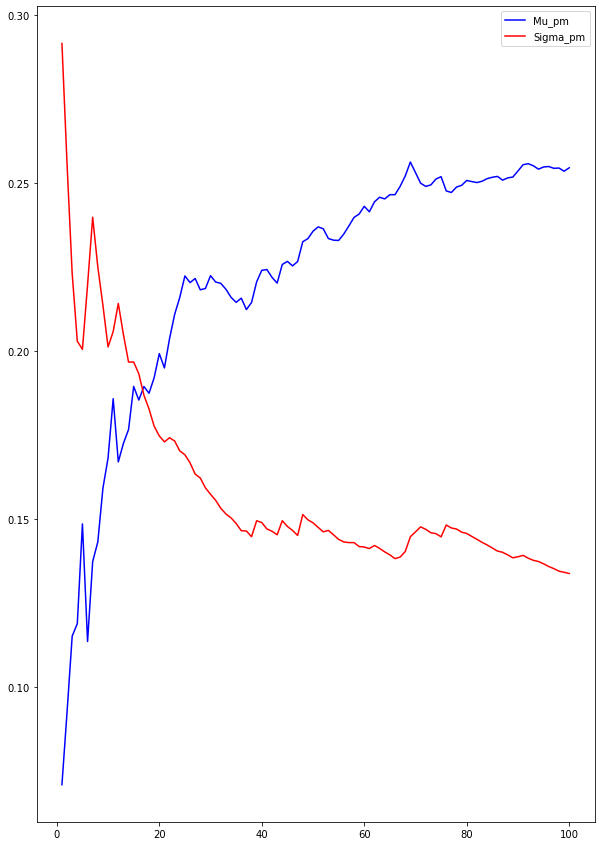

In [179]:
plt.rcParams["figure.figsize"] = (10, 15)
plt.plot(x_axis, mu_pm_collect, label="Mu_pm", color="blue")
plt.plot(x_axis, sig_pm_collect, label="Sigma_pm", color="red")
plt.legend()

(array([ 3.,  1.,  6., 17., 19., 20., 14., 12.,  5.,  3.]),
 array([-0.0952308 , -0.02792409,  0.03938262,  0.10668933,  0.17399604,
         0.24130276,  0.30860947,  0.37591618,  0.44322289,  0.5105296 ,
         0.57783631]),
 <BarContainer object of 10 artists>)

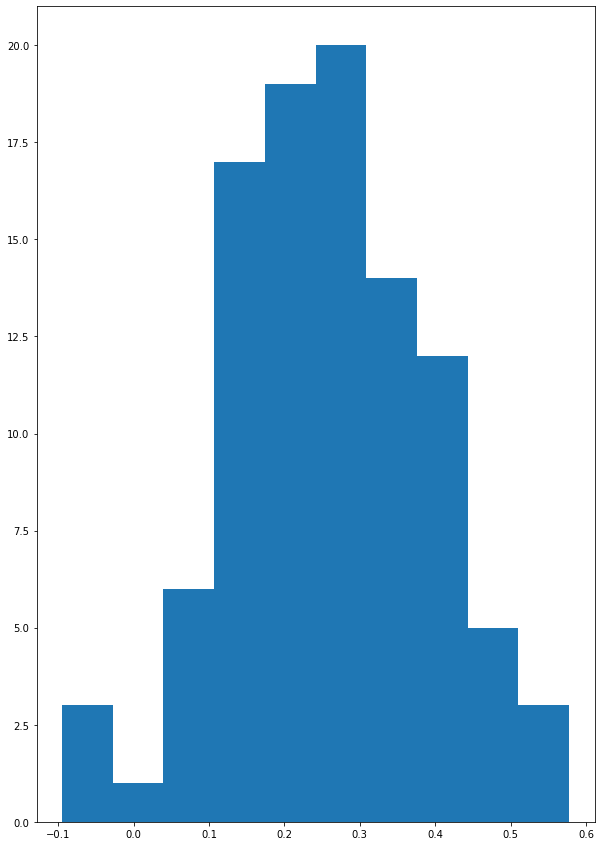

In [193]:
plt.hist(s_t)

In [194]:
s_t.mean()

0.25908742760000003

In [195]:
s_t.std()

0.1327734317836149